In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
files=!ls ../../input/feat/*fwv*dis2*.parq| grep  dis2 |grep -v pca

In [3]:
files

['../../input/feat/dense_train_seq_fwvdis2_offset_.parq',
 '../../input/feat/sp_train_seq_coverage_18_fwvdis2_offset_.parq',
 '../../input/feat/sp_train_seq_coverage_19_fwvdis2_offset_.parq',
 '../../input/feat/sp_train_seq_coverage_20_fwvdis2_offset_.parq',
 '../../input/feat/sp_train_seq_coverage_21_fwvdis2_offset_.parq',
 '../../input/feat/sp_train_seq_coverage_22_fwvdis2_offset_.parq',
 '../../input/feat/test_fwvdis2_offset_.parq',
 '../../input/feat/train_seq_coverage_18_fwvdis2_offset_.parq',
 '../../input/feat/train_seq_coverage_19_fwvdis2_offset_.parq',
 '../../input/feat/train_seq_coverage_20_fwvdis2_offset_.parq',
 '../../input/feat/train_seq_coverage_21_fwvdis2_offset_.parq',
 '../../input/feat/train_seq_coverage_22_fwvdis2_offset_.parq',
 '../../input/feat/train_seq_offset_000000_fwvdis2_offset_.parq',
 '../../input/feat/train_seq_offset_037500_fwvdis2_offset_.parq',
 '../../input/feat/train_seq_offset_075000_fwvdis2_offset_.parq',
 '../../input/feat/train_seq_offset_112500

In [4]:
lst1=[fastparquet.ParquetFile(u).to_pandas() for u in files ]
df1=pd.concat(lst1)
df1.shape

(1115154, 2625)

In [5]:
df1.shape

(1115154, 2625)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1115154 entries, quake_03_0200_105000 to quake_08_0161
Columns: 2625 entries, fwvdis2_0 to y
dtypes: float32(2624), float64(1)
memory usage: 10.9+ GB


In [7]:
df1.head()

fwvdis2_0  fwvdis2_1  fwvdis2_2  fwvdis2_3  fwvdis2_4  \
index                                                                         
quake_03_0200_105000   0.373908   0.595562   0.204750   0.320391   0.866692   
quake_06_0120_099000   0.268125   0.388601   0.286736   0.232787   0.933748   
quake_07_0296_013500   0.472430   0.649886   0.278983   0.392428   1.054446   
quake_03_0090_034500   0.873268   1.066992   0.554504   0.781007   1.006553   
quake_08_0137_055500   0.829631   1.014191   0.533339   0.745276   0.895819   

                      fwvdis2_5  fwvdis2_6  fwvdis2_7  fwvdis2_8  fwvdis2_9  \
index                                                                         
quake_03_0200_105000   1.043426   0.472204   0.244436   0.250700   0.503574   
quake_06_0120_099000   1.003443   0.274518   0.271613   0.407512   0.375904   
quake_07_0296_013500   0.870291   0.530865   0.277950   0.259554   0.586460   
quake_03_0090_034500   1.224193   0.948253   0.554651   0.425315   1.003234   
quake_08_0137_055500   1.253164   0.909222   0.505764   0.405833   0.973716   

                      ...  fwvdis2_2615  fwvdis2_2616  fwvdis2_2617  \
index                 ...                                             
quake_03_0200_105000  ...      0.504935      0.189724      0.710533   
quake_06_0120_099000  ...      0.299033      0.284908      0.686031   
quake_07_0296_013500  ...      0.513820      0.310072      0.917648   
quake_03_0090_034500  ...      0.967639      0.582301      1.078062   
quake_08_0137_055500  ...      0.936577      0.555282      0.985947   

                      fwvdis2_2618  fwvdis2_2619  fwvdis2_2620  fwvdis2_2621  \
index                                                                          
quake_03_0200_105000      0.578969      0.416541      0.687488      0.443781   
quake_06_0120_099000      0.462304      0.553415      0.568112      0.429063   
quake_07_0296_013500      0.746852      0.342977      0.845947      0.651599   
quake_03_0090_034500      1.054623      0.300362      1.134026      0.851159   
quake_08_0137_055500      0.984284      0.327431      1.052908      0.770854   

                      fwvdis2_2622  fwvdis2_2623         y  
index                                                       
quake_03_0200_105000      0.298191      0.567116  0.998098  
quake_06_0120_099000      0.422723      0.449743  2.318898  
quake_07_0296_013500      0.532656      0.726751  4.532197  
quake_03_0090_034500      0.657673      1.037540  5.302996  
quake_08_0137_055500      0.584309      0.959388  2.514399  

[5 rows x 2625 columns]

In [8]:
X=df1.drop('y',axis=1).values
X.shape

(1115154, 2624)

In [9]:
import numpy as np
from sklearn.decomposition import PCA

In [10]:
n_components=10
pca = PCA(n_components=n_components, svd_solver='randomized')

In [11]:
%%time
pca.fit(X)
print(np.sum(pca.explained_variance_ratio_)  )
print(pca.explained_variance_ratio_)  

0.9988483296929664
[7.26182723e-01 1.95631736e-01 6.52126450e-02 4.12216386e-03
 3.64106580e-03 1.74541709e-03 9.12153539e-04 6.29369556e-04
 4.43473749e-04 3.27581644e-04]
CPU times: user 1min 48s, sys: 7 s, total: 1min 55s
Wall time: 44.2 s


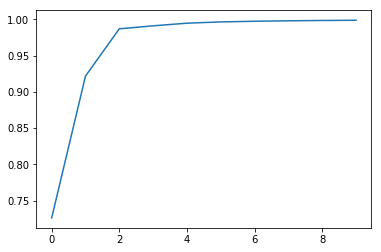

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

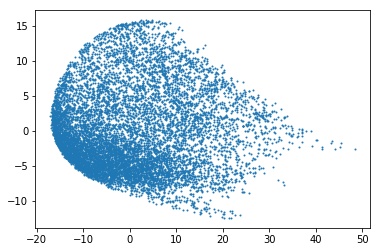

In [13]:
a=pca.transform(X[np.random.permutation(range(len(X)))[:10000]])
plt.scatter(a[:,0],a[:,1],s=1)

In [14]:
for fname in files:
    fname2=fname.replace("_fwvdis2_", "_fwvdis2_pca{}_".format(n_components))
    assert(fname<>fname2)
    print fname2
    adf = fastparquet.ParquetFile(fname).to_pandas()
    ax=adf.drop('y',axis=1).values
    atx = pca.transform(ax)
    adf2=pd.DataFrame(atx,index=adf.index,columns=["fwvdis_pca{}_{}".format(n_components,i) for i in range(n_components)])
    adf2['y']=adf['y']
    fastparquet.write(fname2,adf2,compression='SNAPPY')
    #break

../../input/feat/dense_train_seq_fwvdis2_pca10_offset_.parq


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/fastparquet/util.py:221: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  inferred_dtype = infer_dtype(column)


../../input/feat/sp_train_seq_coverage_18_fwvdis2_pca10_offset_.parq
../../input/feat/sp_train_seq_coverage_19_fwvdis2_pca10_offset_.parq
../../input/feat/sp_train_seq_coverage_20_fwvdis2_pca10_offset_.parq
../../input/feat/sp_train_seq_coverage_21_fwvdis2_pca10_offset_.parq
../../input/feat/sp_train_seq_coverage_22_fwvdis2_pca10_offset_.parq
../../input/feat/test_fwvdis2_pca10_offset_.parq
../../input/feat/train_seq_coverage_18_fwvdis2_pca10_offset_.parq
../../input/feat/train_seq_coverage_19_fwvdis2_pca10_offset_.parq
../../input/feat/train_seq_coverage_20_fwvdis2_pca10_offset_.parq
../../input/feat/train_seq_coverage_21_fwvdis2_pca10_offset_.parq
../../input/feat/train_seq_coverage_22_fwvdis2_pca10_offset_.parq
../../input/feat/train_seq_offset_000000_fwvdis2_pca10_offset_.parq
../../input/feat/train_seq_offset_037500_fwvdis2_pca10_offset_.parq
../../input/feat/train_seq_offset_075000_fwvdis2_pca10_offset_.parq
../../input/feat/train_seq_offset_112500_fwvdis2_pca10_offset_.parq


In [15]:
fname

'../../input/feat/train_seq_offset_112500_fwvdis2_offset_.parq'